# Codigo de Analisis MT5 para modelos estocasticos

In [1]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import MetaTrader5 as mt5
from datetime import datetime as dt
import datetime as dat
import numpy as np
from Informacion import Informacion
from Inicializar import IniciarMT5
import scipy as sp
from Formulas import Stocastic_Hesston
IniciarMT5()

Failed to login
Inicializacion Completa
Inicializacion Completa


c:\Users\Miguel\Documents\Metatrader\Algoritmos\Formulas.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[a] = S


Alza:  0.966
Baja:  0.034


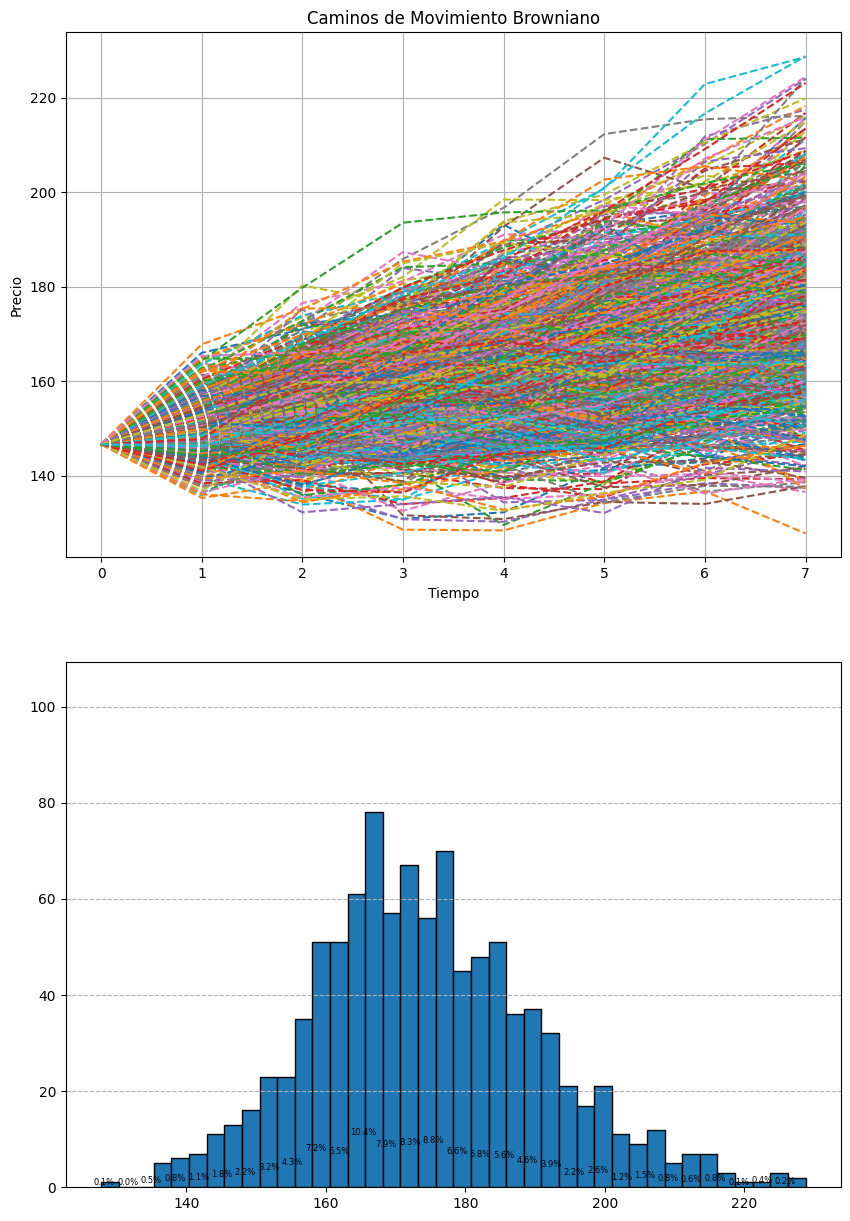

In [12]:
datos = Informacion("Amazon", 5000 , "D1")
Stocastic_Hesston(datos, paths= 1000, Ventana= 8, T = 2)